In [69]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Loading the dataset
dataset_path = 'customer_segmentation_dataset.csv'
data = pd.read_csv(dataset_path)

# Displaying the first few rows of the dataset for verification
data.head()

,Age,Annual_Income_k$,Spending_Score,Visits_Per_Month,Tenure_Years,Discount_Usage_%,Online_Purchases_%
0,56,86,49,2,4,73.622888,5.910582
1,46,12,44,22,5,43.641960,69.072632
2,32,42,56,16,8,66.677191,72.878622
3,60,15,28,25,6,9.432743,4.697299
4,25,59,79,2,4,74.800474,92.805175


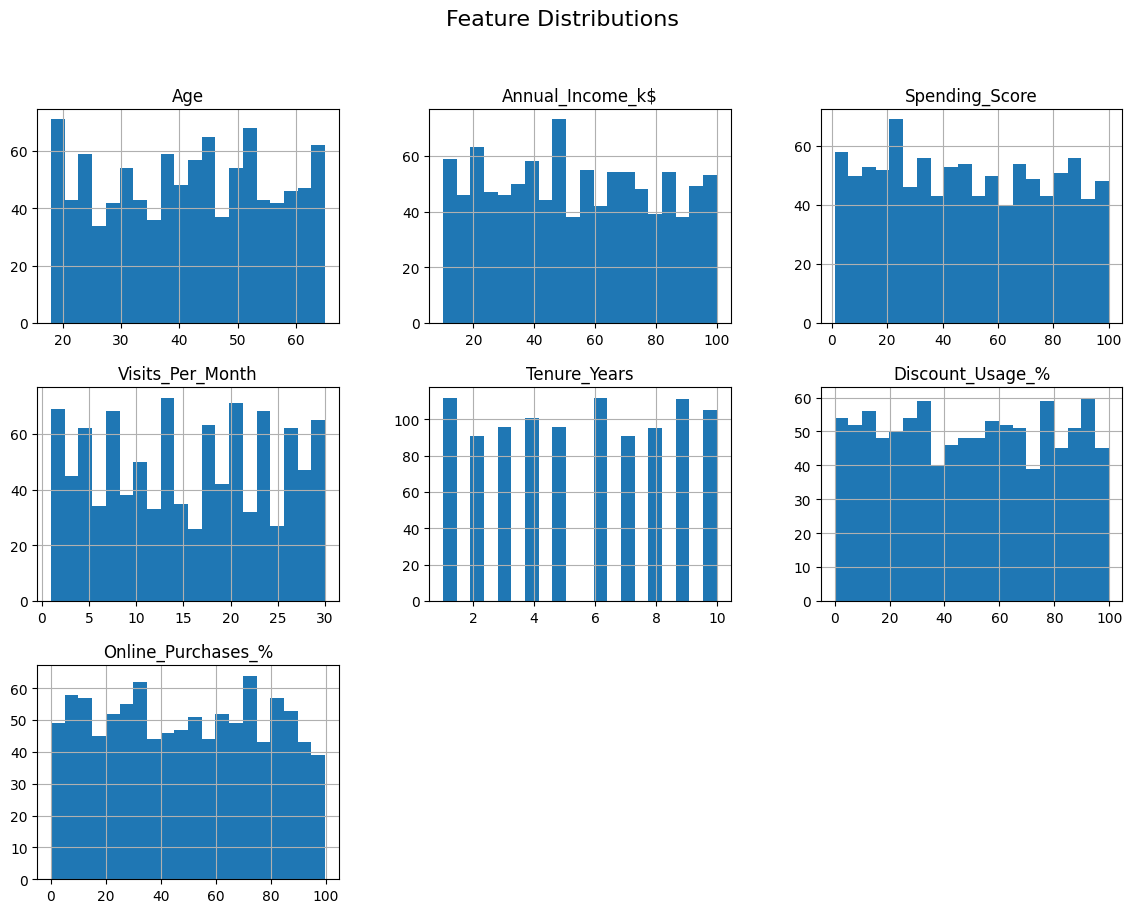

In [73]:
# Conducting Exploratory Data Analysis (EDA)
import seaborn as sns

# Plotting histograms to understand feature distributions
data.hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

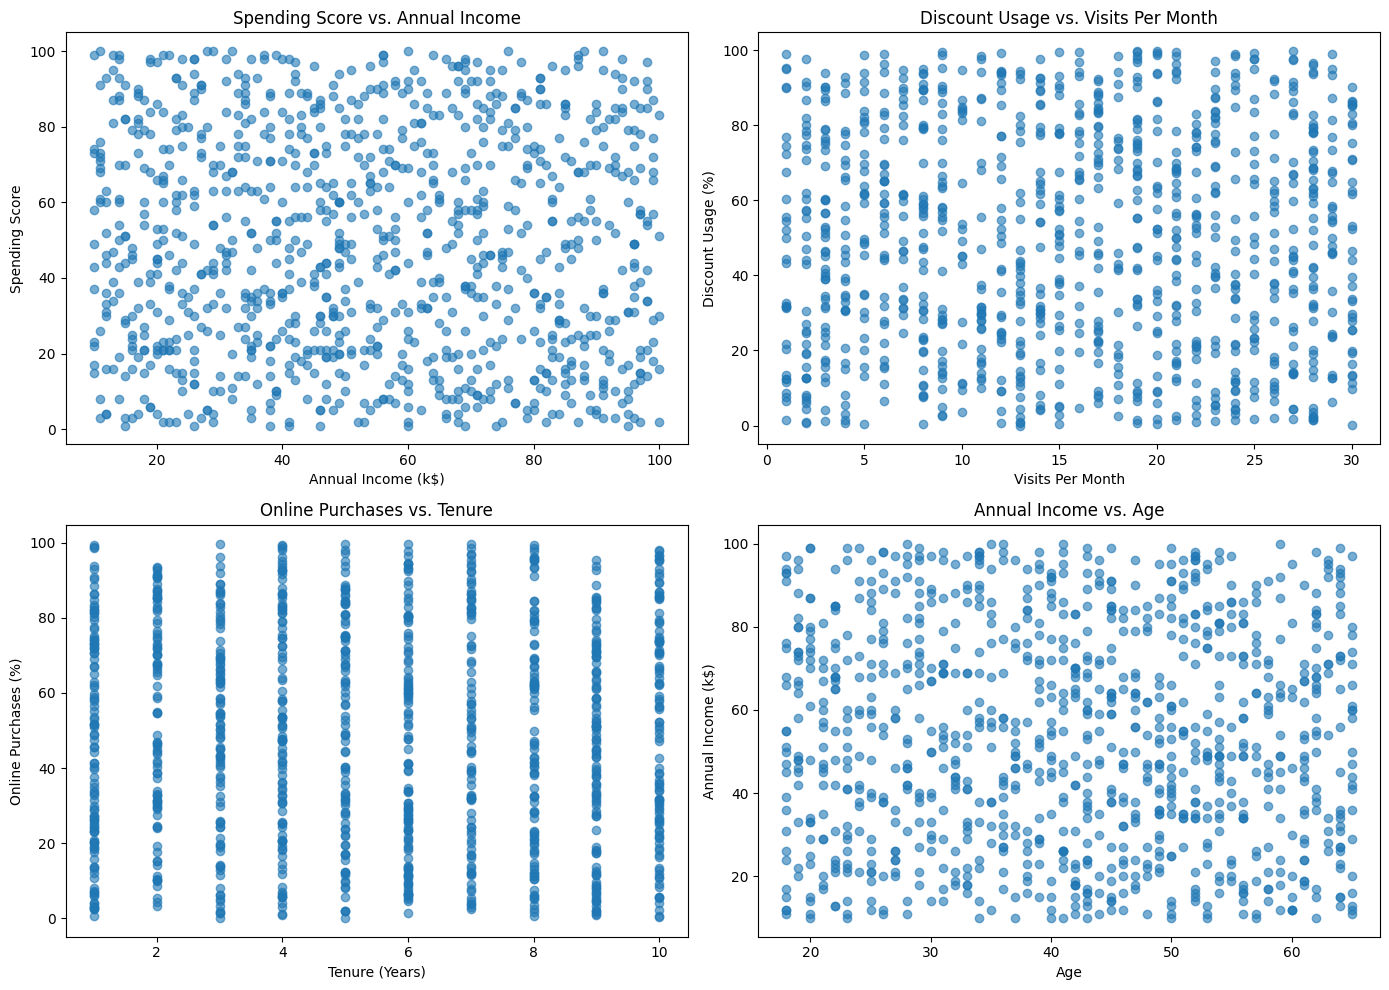

In [83]:
# Visualizing distributions and relationships

# Plotting scatter plots for selected feature pairs
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
plt.scatter(data['Annual_Income_k$'], data['Spending_Score'], alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Spending Score vs. Annual Income')

plt.subplot(2, 2, 2)
plt.scatter(data['Visits_Per_Month'], data['Discount_Usage_%'], alpha=0.6)
plt.xlabel('Visits Per Month')
plt.ylabel('Discount Usage (%)')
plt.title('Discount Usage vs. Visits Per Month')

plt.subplot(2, 2, 3)
plt.scatter(data['Tenure_Years'], data['Online_Purchases_%'], alpha=0.6)
plt.xlabel('Tenure (Years)')
plt.ylabel('Online Purchases (%)')
plt.title('Online Purchases vs. Tenure')

plt.subplot(2, 2, 4)
plt.scatter(data['Age'], data['Annual_Income_k$'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Annual Income vs. Age')

plt.tight_layout()
plt.show()

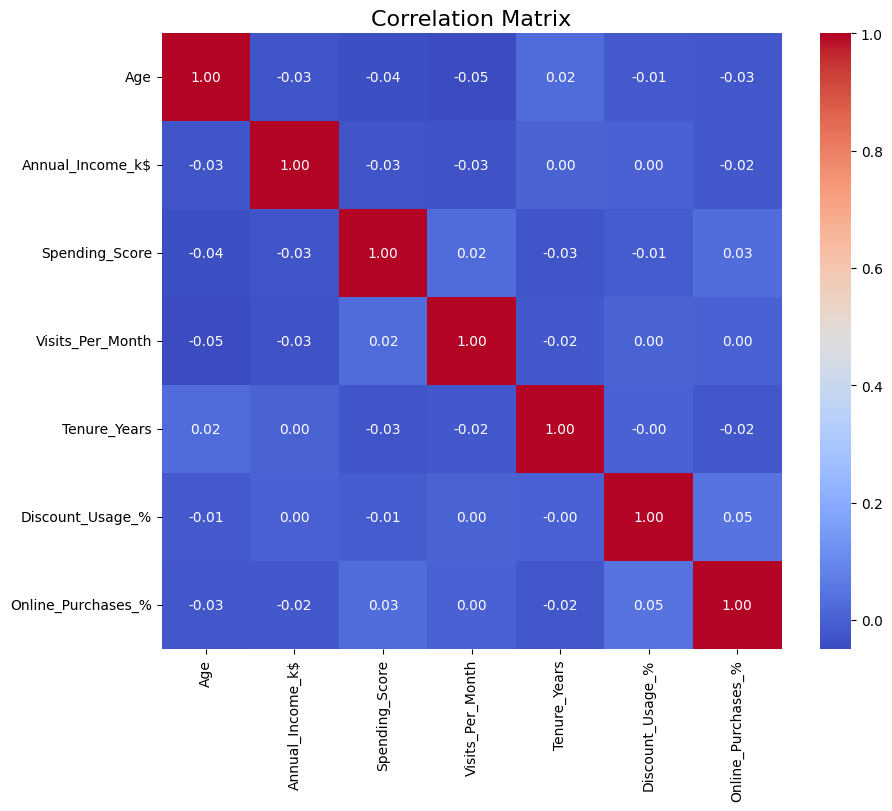

In [85]:
# Checking correlations with simpler matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [87]:
# Preprocessing the dataset (Normalization)

# Initializing the scaler
scaler = StandardScaler()

# Normalizing the data
scaled_data = scaler.fit_transform(data)

# Converting the normalized data back to a DataFrame for easier handling
normalized_data = pd.DataFrame(scaled_data, columns=data.columns)

# Displaying a preview of the normalized data
normalized_data.head()

,Age,Annual_Income_k$,Spending_Score,Visits_Per_Month,Tenure_Years,Discount_Usage_%,Online_Purchases_%
0,1.048774,1.243391,-0.002859,-1.541743,-0.525549,0.826447,-1.499643
1,0.322058,-1.600973,-0.174745,0.743494,-0.181764,-0.201811,0.706640
2,-0.695345,-0.447852,0.237782,0.057923,0.849593,0.588230,0.839586
3,1.339460,-1.485661,-0.724782,1.086279,0.162022,-1.375087,-1.542023
4,-1.204046,0.205583,1.028459,-1.541743,-0.525549,0.866835,1.535631


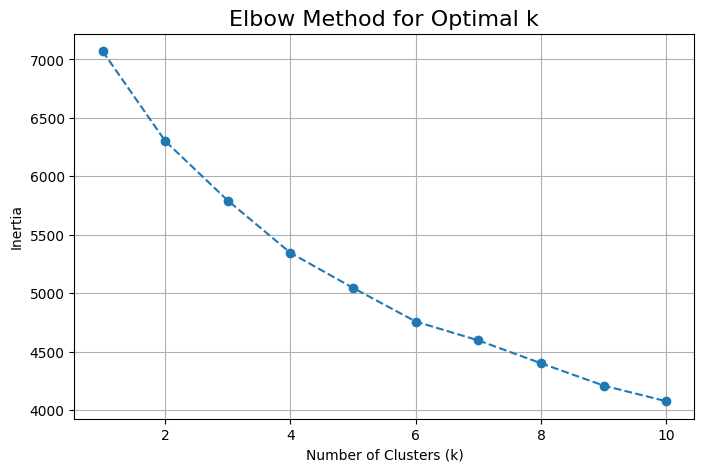

In [117]:
# Applying KMeans Clustering

# Finding the optimal number of clusters using the Elbow Method
inertia = []  # To store inertia for each k value
k_values = range(1, 11)  # Testing k from 1 to 10

# Calculating inertia for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k", fontsize=16)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

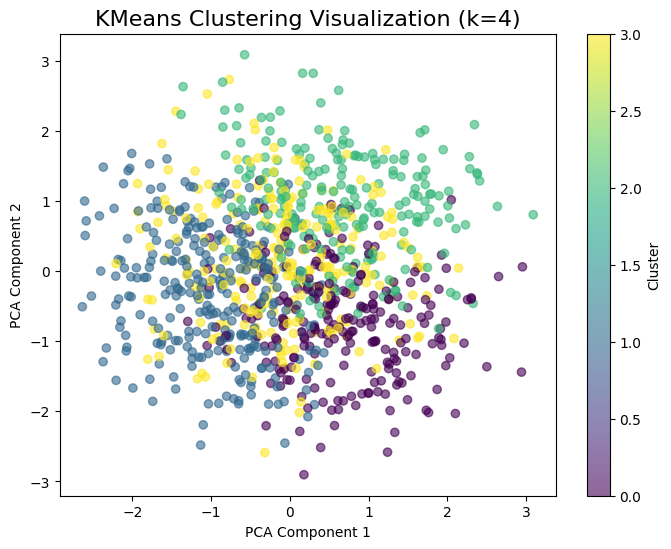

In [119]:
# Applying KMeans Clustering with k=4

# Applying KMeans with k=4
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
kmeans_labels_k4 = kmeans_k4.fit_predict(normalized_data)

# Adding the cluster labels for k=4 to the dataset
data['KMeans_Cluster_k4'] = kmeans_labels_k4

# Visualizing the clusters for k=4 using PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels_k4, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering Visualization (k=4)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [121]:
from sklearn.metrics import silhouette_score

# Calculating the Silhouette Score for KMeans with k=4
silhouette_score_k4 = silhouette_score(normalized_data, kmeans_labels_k4)

# Displaying the Silhouette Score
silhouette_score_k4

0.11015560898606226

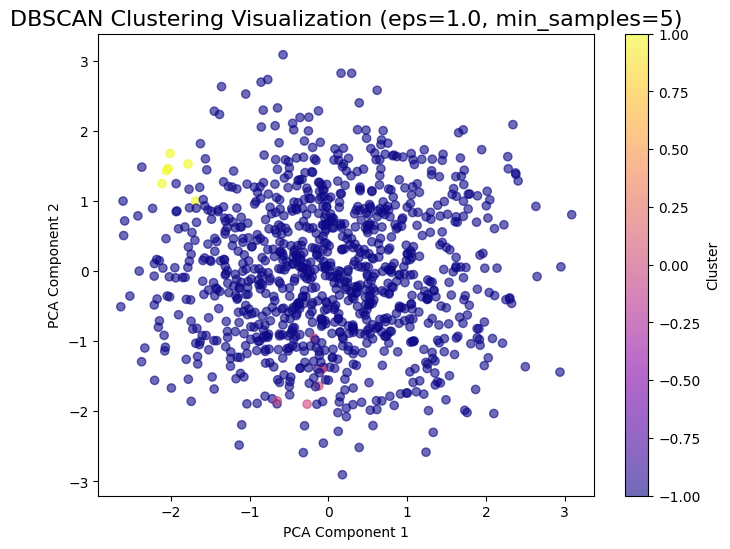

In [125]:
# Implementing DBSCAN Clustering

# Setting DBSCAN parameters
eps = 1.0  # Maximum distance for points to be considered in the same neighborhood
min_samples = 5  # Minimum number of points required to form a dense region

# Applying DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(normalized_data)

# Adding DBSCAN cluster labels to the dataset
data['DBSCAN_Cluster'] = dbscan_labels

# Calculating the Silhouette Score (excluding noise points)
non_noise_mask = dbscan_labels != -1  # Exclude noise points (-1)
if len(set(dbscan_labels[non_noise_mask])) > 1:  # Silhouette requires >1 cluster
    silhouette_score_dbscan = silhouette_score(normalized_data[non_noise_mask], dbscan_labels[non_noise_mask])
else:
    silhouette_score_dbscan = "N/A (less than 2 clusters)"

# Visualizing the clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=dbscan_labels,
    cmap='plasma',
    alpha=0.6
)
plt.title(f"DBSCAN Clustering Visualization (eps={eps}, min_samples={min_samples})", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [127]:
# Displaying Silhouette Score for DBSCAN
silhouette_score_dbscan

0.7166831008364365

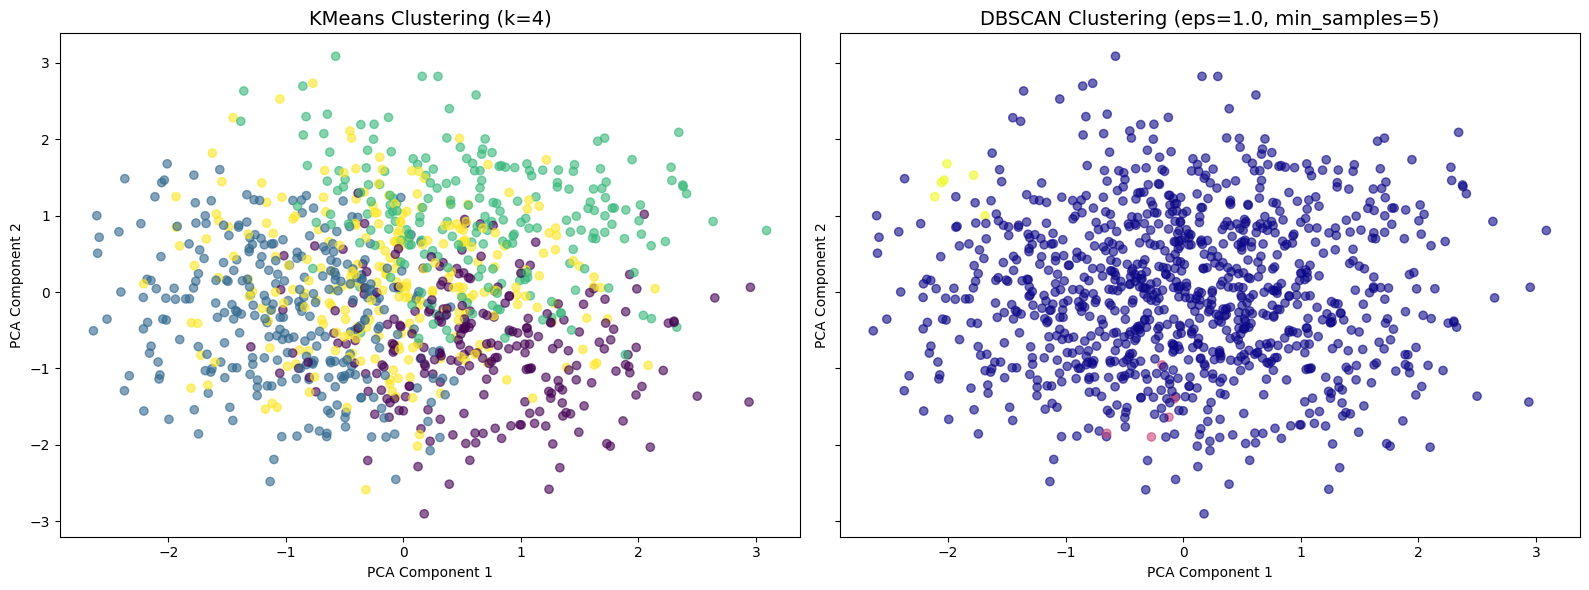

Silhouette Score for KMeans (k=4): 0.110
Silhouette Score for DBSCAN: 0.717


In [129]:
# Comparing KMeans (k=4) and DBSCAN Clusters

# Side-by-side visualization of KMeans (k=4) and DBSCAN clusters
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

# Plotting KMeans (k=4) clusters
axes[0].scatter(pca_result[:, 0], pca_result[:, 1], c=data['KMeans_Cluster_k4'], cmap='viridis', alpha=0.6)
axes[0].set_title("KMeans Clustering (k=4)", fontsize=14)
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# Plotting DBSCAN clusters
axes[1].scatter(pca_result[:, 0], pca_result[:, 1], c=data['DBSCAN_Cluster'], cmap='plasma', alpha=0.6)
axes[1].set_title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})", fontsize=14)
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

# Adjust layout
plt.tight_layout()
plt.show()

# Printing silhouette scores for comparison
print(f"Silhouette Score for KMeans (k=4): {silhouette_score_k4:.3f}")
print(f"Silhouette Score for DBSCAN: {silhouette_score_dbscan:.3f}")